# Pymaceuticals Inc.
---

In [26]:
# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats

# file paths
mouse_metadata_data = ('data/Mouse_metadata.csv')
study_results_data = ('data/Study_results.csv')

# read files
mouse_metadata_df = pd.read_csv(mouse_metadata_data)
study_results = pd.read_csv(study_results_data)

# merge data frames
raw_data_df = pd.merge(study_results, mouse_metadata_df, how="left")

# display merged data frame
raw_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [27]:
# total mice
raw_total_mice = raw_data_df['Mouse ID'].nunique()
raw_total_mice

249

In [28]:
# find duplicate mice
duplicates = raw_data_df[raw_data_df.duplicated(subset=['Mouse ID', "Timepoint"], keep=False)]
duplicate_mice = duplicates['Mouse ID'].unique()
duplicate_mice

array(['g989'], dtype=object)

In [29]:
# get data for duplicate mouse
g989_df = raw_data_df.loc[raw_data_df['Mouse ID'] == 'g989']
g989_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [30]:
# clean dataframe
data_df = raw_data_df.drop(raw_data_df[raw_data_df['Mouse ID'] == 'g989'].index)
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [31]:
# total mice in clean dataframe
total_mice = data_df['Mouse ID'].nunique()
total_mice

248

## Summary Statistics

In [32]:
# create summary statistics table
drug_group = data_df.groupby(['Drug Regimen'])
summary_stats = drug_group['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume','Tumor Volume Variance', 'Tumor Volume Std. Dev', 'Tumor Volume Std. Err.']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

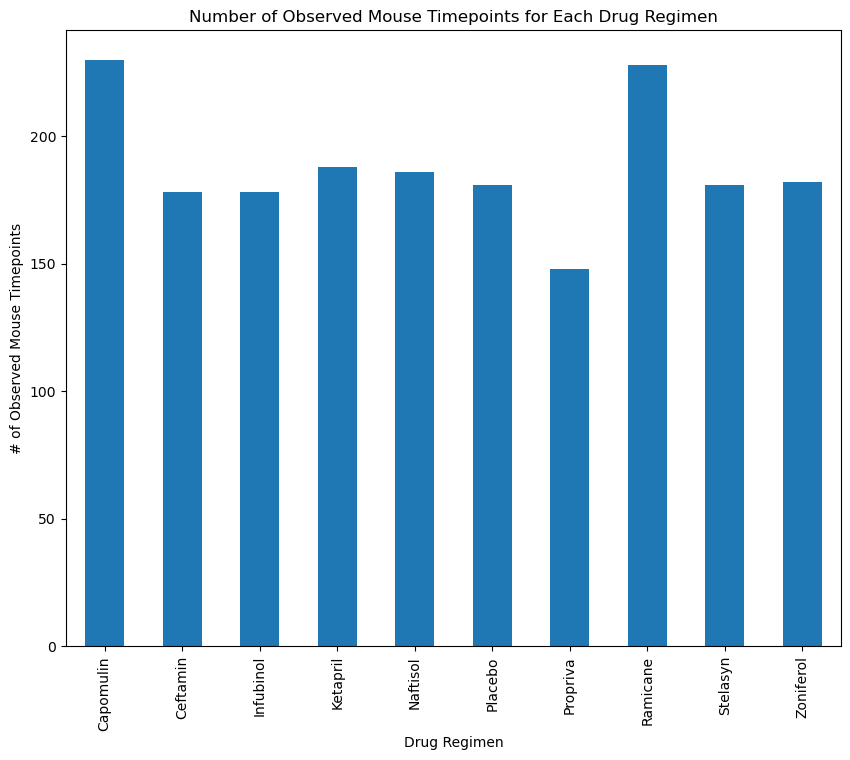

In [33]:
# bar plot using pandas

# define x axis
timepoints_pandas = data_df.groupby('Drug Regimen')['Timepoint'].count()

# creat bar plot
bar_plot = timepoints_pandas.plot(kind='bar', figsize=(10,8), rot=90)
bar_plot.set_xlabel('Drug Regimen')
bar_plot.set_ylabel('# of Observed Mouse Timepoints')
bar_plot.set_title('Number of Observed Mouse Timepoints for Each Drug Regimen')

# display plot
bar_plot;

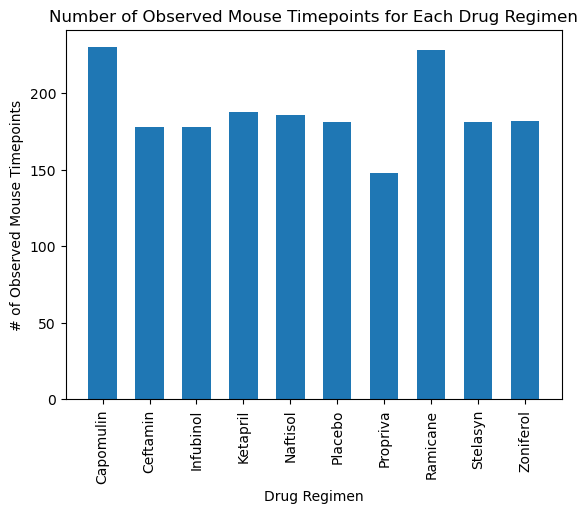

In [34]:
# bar plot using pyplot

# set values
drug_regimen = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 
                'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
pyplot_timepoints = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

# create bar plot
plt.bar(drug_regimen, pyplot_timepoints, align='center',width=0.6)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('Number of Observed Mouse Timepoints for Each Drug Regimen')
plt.xticks(rotation=90)

# display plot
plt.show()

In [35]:
# setting up pie plot variables

# find total male and female mice
sex_counts = data_df['Sex'].value_counts()
sex_counts

Sex
Male      958
Female    922
Name: count, dtype: int64

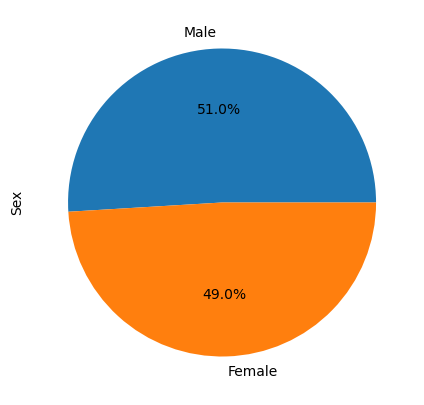

In [36]:
# pie plot using pandas

# assign pie plot characteristics
sex_df = pd.DataFrame({
     'Sex' : [958,922]},
     index=['Male', 'Female'])

# create pie plot
plot = sex_df.plot.pie(y='Sex', figsize=(5,5), autopct='%1.1f%%', legend=False)
plot;

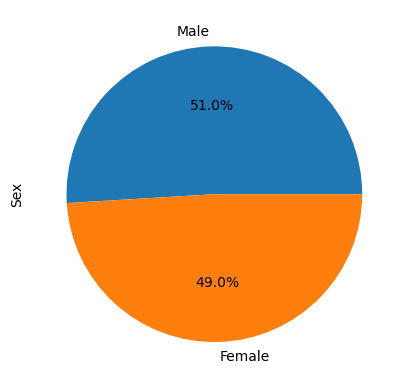

In [37]:
# pie plot using pyplot

# assign pie plot characteristics
sex = ['Male', 'Female']
sex_count = [958, 922]
colors = ['tab:blue','tab:orange']

# create pie plot
plt.ylabel('Sex')
plt.pie(sex_count, labels=sex, colors=colors, autopct='%1.1f%%', startangle=0,)
plt.show()

## Quartiles, Outliers and Boxplots

In [38]:
# calculate final tumor volume of each mouse for drug regimens

# filter df by relevant drugs
drug_filtered_df = data_df.loc[(data_df['Drug Regimen'] == 'Capomulin') |
                                (data_df['Drug Regimen'] == 'Ramicane') |
                                (data_df['Drug Regimen'] == 'Infubinol') |
                                (data_df['Drug Regimen'] == 'Ceftamin'),
                                ['Mouse ID', 'Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

# find last timepoints of each mouse/drug
final_timepoint = drug_filtered_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].max().reset_index()

# merge data
final_tumor_vol_df = pd.merge(final_timepoint, drug_filtered_df, on=['Drug Regimen','Mouse ID','Timepoint'], how='left')
final_tumor_vol_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
95,Ramicane,s508,45,30.276232
96,Ramicane,u196,45,40.667713
97,Ramicane,w678,5,43.166373
98,Ramicane,y449,15,44.183451


In [39]:
# put treatments into list for for loop
treatment = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# create empty list for tumor vol data
tumor_vol = []

# calculate IQR and determine outliers
for drug in treatment:

    # locate rows containing mice on each drug and retrieve tumor volumes
    drug_tumor_vol = final_tumor_vol_df \
    .loc[final_tumor_vol_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol.append(drug_tumor_vol)

    # determine outliers using upper and lower bounds
    quartiles = drug_tumor_vol.quantile([0.25,0.5,0.75])
    
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q

    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr

    outliers = drug_tumor_vol \
    .loc[(drug_tumor_vol < lower_bound) | (drug_tumor_vol > upper_bound)]
    print(outliers)


Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
55    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


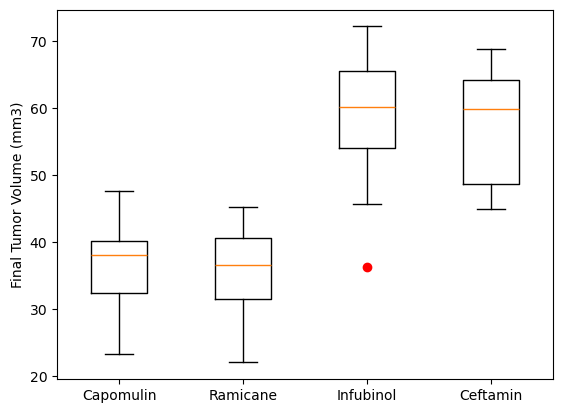

In [40]:
# generate box plot of tumor volumes for each treatment group
fig1, ax = plt.subplots()
ax.boxplot(tumor_vol, 0, 'r')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(treatment)

plt.show()

## Line and Scatter Plots

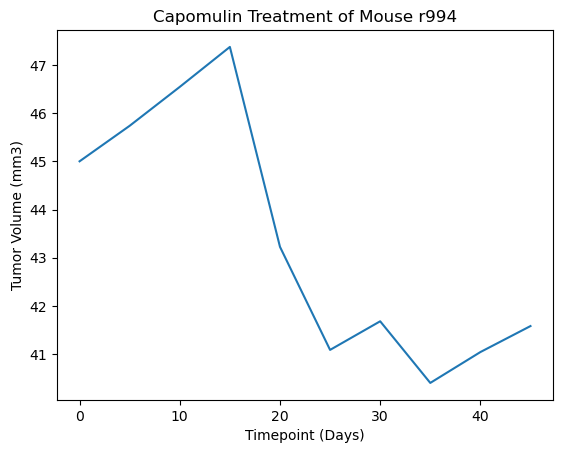

In [41]:
# generate line plot of tumor volume vs. time point for single mouse treated with capomulin

capomulin_mice = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
single_mouse = capomulin_mice[capomulin_mice['Mouse ID'] == 'r944']

r994_timepoint = single_mouse['Timepoint']
r994_volume = single_mouse['Tumor Volume (mm3)']

r994_line_plot = plt.plot(r994_timepoint, r994_volume)
plt.title('Capomulin Treatment of Mouse r994')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

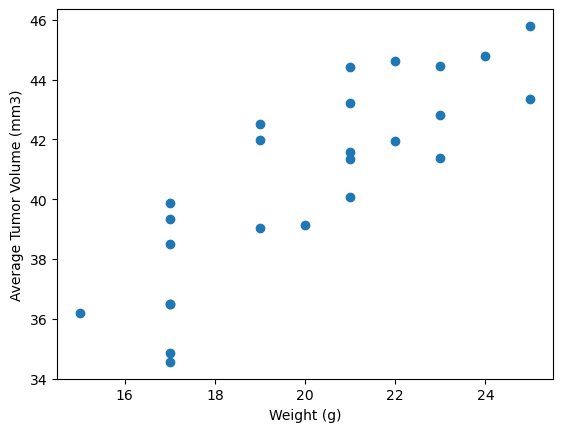

In [42]:
# generate scatter plot of mouse weight vs. average observed tumor volume for capomulin
capomulin_tumor = capomulin_mice.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
capomulin_weight = capomulin_mice.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(capomulin_weight, capomulin_tumor, marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume for the Capomulin regimen is 0.84


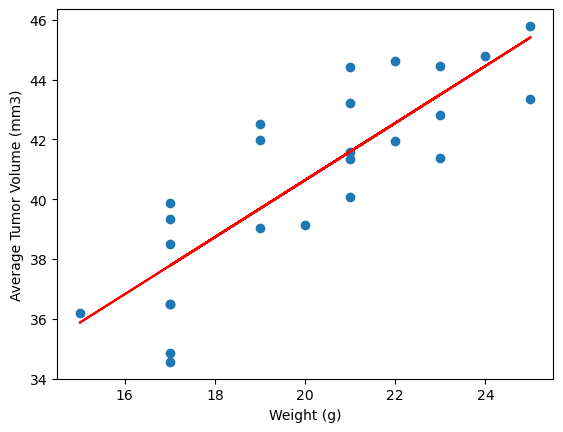

In [43]:
# mouse weight and average observed tumor volume for capomulin regimen

# calculate correlation coefficient 
correlation = st.pearsonr(capomulin_weight,capomulin_tumor)
print(f"The correlation between mouse weight and the average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")

# generate linear regression model
tumvol_slope, tumvol_int, tumvol_r, tumvol_p, tumvol_std_err = stats.linregress(capomulin_weight,capomulin_tumor)
tumvol_fit = tumvol_slope * capomulin_weight + tumvol_int

plt.scatter(capomulin_weight, capomulin_tumor)
plt.plot(capomulin_weight, tumvol_fit, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()